In [1]:
import os

In [454]:
directory = os.listdir('./dataset')
directory

['.DS_Store',
 'Marion_Cotillard',
 'paris_hilton',
 'messi',
 'cropped',
 'roger_federer']

In [102]:
subdirectory = {}
myfile_filelist = []
for i in directory:
    if os.path.isdir(i):
        myfile_filelist.append(i)
for i in myfile_filelist:
    subdirectory[i] = os.listdir(i)
        
        

# renaming files of person in a folder with name associated with it

In [453]:
#Changing the file name inside the directory directory 
subdirectory2 = {}
myfile_filelist2 = []
for i in directory:
    if not os.path.isdir(i):
        pass
    else:
        myfile_filelist2.append(i)
for i in myfile_filelist2:
    for count,filename in enumerate(os.listdir('./dataset/'+i)):
        print(filename,count)
        dst = i+'/'+i+str(count)+ ".jpg"
        src = i+'/'+filename
        os.rename(src, dst)
        

In [452]:
myfile_filelist2

[]

In [3]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('dataset/Marion_Cotillard/th (114).jpeg')


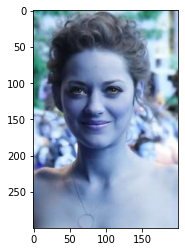

In [5]:
plt.imshow(img)

(300, 200)


array([[143, 141, 135, ..., 198, 210, 220],
       [149, 146, 140, ..., 198, 210, 221],
       [158, 156, 150, ..., 197, 210, 221],
       ...,
       [ 74,  75,  77, ..., 216, 216, 216],
       [ 75,  76,  78, ..., 217, 217, 217],
       [ 75,  76,  78, ..., 218, 218, 218]], dtype=uint8)

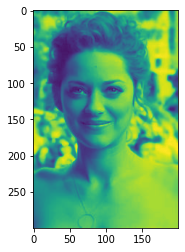

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray)
gray

In [7]:
face_cascade = cv2.CascadeClassifier('../../../opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('../../../opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 27,  63, 120, 120]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(27, 63, 120, 120)

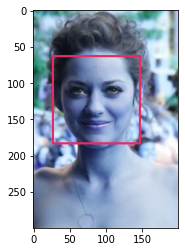

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(230,44,100),2)
plt.imshow(face_img)

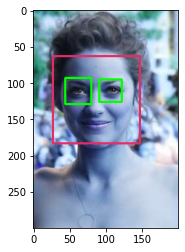

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(230,44,100),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

In [557]:
def cropped_face_2_eyes(impath):
    my_image = cv2.imread(impath)
    gray = cv2.cvtColor(my_image,cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('../../../opencv/haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('../../../opencv/haarcascades/haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = my_image[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [564]:
cropped_image = cropped_face_2_eyes('./dataset/paris_hilton/th (102).jpeg')
cropped_image

In [225]:
path_to_data = './dataset'
path_to_cr_data = './dataset/cropped'
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [226]:
img_dirs

['./dataset/mbappe',
 './dataset/picasso',
 './dataset/henry',
 './dataset/zidane']

In [227]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_data)
os.mkdir(path_to_cr_data)

In [474]:
os.listdir('./dataset')

['Lional_messi',
 '.DS_Store',
 'Marion_Cotillard',
 'paris_hilton',
 'roger_federer']

In [475]:
cropped_image_dir = []
dataset = './dataset/'
mylist = os.listdir('./dataset/')
for i in mylist:
    if os.path.isdir('./dataset/'+i):
        myfile = os.listdir('./dataset/'+i)
        for j in myfile:
            y = dataset+i+'/'+j
            #print(y)
            for entry in os.scandir(dataset+'/'+ i):
                cropped_face = cropped_face_2_eyes(y) 
                #print("value is", cropped_face)
                if cropped_face is not None:
                    mypath = dataset+'cropped/'+i
                    print('mypath', mypath)
                    if not os.path.exists(mypath):
                        os.makedirs(mypath)
                    cropped_file_name = i+'_'+ j + '.png'
                    cropped_file_name_path = mypath + '/' + cropped_file_name
                    for entry in os.scandir(mypath):
                        os.remove(entry)
                    cv2.imwrite(cropped_file_name_path, cropped_face)
                    
        

mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dataset/cropped/Lional_messi
mypath ./dat

KeyboardInterrupt: 

In [329]:
if os.path.isdir('./dataset/mbappe/'):
    print('hello')
    
else:
    print('no')

hello


# create cropped face of provided images and store them in cropped folder of each person file name with their new file name

In [479]:
cropped_image_dir = []
person_name_file_list = {}
dataset = './dataset/'
mylist = os.listdir(dataset)
mylist
for i in mylist:
    print(i)
    person_name_file_list[i]=[]
    if os.path.isdir(dataset+i):
        person = dataset+i
        if os.scandir(person):
            for j in os.listdir(person):
                pic = person+'/'+j
                
                if os.path.isdir(pic+'/'):
                    pass
                else:
                    if not os.path.isdir(pic):
                        try:
                            cropped_face = cropped_face_2_eyes(pic)
                        except:
                            print(pic)
                        if cropped_face is None:
                            pass
                        else:
                            mypath = dataset+'cropped/'+i   
                            if not os.path.exists(mypath):
                                os.makedirs(mypath)
                            cropped_file_name = i+'_'+j+'.png'
                            cropped_file_name_path = mypath + '/' + cropped_file_name
                            cv2.imwrite(cropped_file_name_path, cropped_face)
                                                       
                            person_name_file_list[i].append(cropped_file_name_path)  


Lional_messi
./dataset/Lional_messi/.DS_Store
mbappe
./dataset/mbappe/.DS_Store
.DS_Store
Marion_Cotillard
./dataset/Marion_Cotillard/.DS_Store
paris_hilton
./dataset/paris_hilton/.DS_Store


In [480]:
person_name_file_list

{'Lional_messi': ['./dataset/cropped/Lional_messi/Lional_messi_th (23).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (42).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (147).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (64).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (44).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (106).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (143).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (27).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (41).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (39).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (20).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (65).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (127).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (19).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (24).j

In [352]:
#example to append list of item in dictionary 
tdict = {}
mylist1 = ['apple','banan','cow']
for i in mylist1:
    tdict[i] = [] # here we are using iterating name as  key for tdict.  
    path = 'dataset/'+i+'/'+i+'.png'
    tdict[i].append(path)

# delete emply list in the dictionary made for our Feature Engineering

In [482]:
# function to delete empty list in dictionary
def delempty_listIn_dictionary(d):
    emptlylist = []
    for key,value in d.items():
        if not value:
            emptlylist.append(key)
    for i in emptlylist:
        del d[i]
    return emptlylist
delempty_listIn_dictionary(person_name_file_list)

['.DS_Store']

In [483]:
person_name_file_list

{'Lional_messi': ['./dataset/cropped/Lional_messi/Lional_messi_th (23).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (42).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (147).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (64).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (44).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (106).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (143).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (27).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (41).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (39).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (20).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (65).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (127).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (19).jpeg.png',
  './dataset/cropped/Lional_messi/Lional_messi_th (24).j

# Now lets make the valvet image transformation 

In [485]:
import numpy as np
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img
    #for converting image to gray form RGB
    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    # convert to floating value
    imArray = np.float32(imArray)
    #normalize data
    imArray /=255;
    #compute the coefficients
    coeffs=pywt.wavedec2(imArray,mode,level=level)
    
    # process the Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;
    
    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H
    

In [12]:
im_hr = w2d(cv2.imread('./dataset/cropped/paris_hilton/paris_hilton_th (101).jpeg.png'),'db1',5)
plt.imshow(im_hr,cmap='gray')

SyntaxError: invalid syntax (<ipython-input-12-4c0a730fc200>, line 2)

In [411]:
person_name_file_list

{'mbappe': ['./dataset/cropped/mbappe/mbappe_mbappe8.jpg.png',
  './dataset/cropped/mbappe/mbappe_mbappe11.jpg.png',
  './dataset/cropped/mbappe/mbappe_mbappe7.jpg.png',
  './dataset/cropped/mbappe/mbappe_mbappe1.jpg.png',
  './dataset/cropped/mbappe/mbappe_mbappe14.jpg.png'],
 'picasso': ['./dataset/cropped/picasso/picasso_picasso9.jpg.png',
  './dataset/cropped/picasso/picasso_picasso0.jpg.png',
  './dataset/cropped/picasso/picasso_picasso5.jpg.png'],
 'henry': ['./dataset/cropped/henry/henry_henry5.jpg.png',
  './dataset/cropped/henry/henry_henry7.jpg.png',
  './dataset/cropped/henry/henry_henry1.jpg.png',
  './dataset/cropped/henry/henry_henry8.jpg.png',
  './dataset/cropped/henry/henry_henry14.jpg.png'],
 'zidane': ['./dataset/cropped/zidane/zidane_zidane14.jpg.png',
  './dataset/cropped/zidane/zidane_zidane3.jpg.png',
  './dataset/cropped/zidane/zidane_zidane8.jpg.png']}

# lets make numerize the person name so that we can get our value y for model testing
# for this we are maiking a dictionary with key name of person lis dictionary from previous atempt
# after that we are assigining it value

In [487]:
class_dict = {}
count = 0
for personname in person_name_file_list.keys():
    class_dict[personname] = count
    count = count+1
class_dict

{'Lional_messi': 0, 'mbappe': 1, 'Marion_Cotillard': 2, 'paris_hilton': 3}

# create wavlet image list from our existing file with the help of file dictionary
#reshape the file in 32,32
#combine the just scaled image normal with the wavelet image of same size
# create a list X and y where y is form the help of class_dict

In [488]:
X = []
y = []
for person_name, training_file in person_name_file_list.items():
    for file in training_file:
        img = cv2.imread(file)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)   
        y.append(class_dict[person_name])

In [489]:
len(X),len(y)

(263, 263)

# reshape the X list 

In [492]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(263, 4096)

In [493]:
X[0]

array([ 20.,  38.,  47., ..., 253., 253.,  26.])

# Training Model

In [494]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [495]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc',SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.9545454545454546

In [496]:
len(X_test)

66

# lets find out the classification reprot that how the accuracy is done one testing image as per trainning

In [497]:
 print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.83      0.91      0.87        11
           2       0.97      1.00      0.99        34
           3       1.00      0.90      0.95        10

    accuracy                           0.95        66
   macro avg       0.95      0.93      0.94        66
weighted avg       0.96      0.95      0.95        66



In [502]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# now lets try GridSearch to try out different models and test which model actually fits and give 
# the best results with their parameters to turn on 

In [500]:
model_params = {
    'svm':{
        'model':svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C' : [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logisticregression__C':[1,5,10]
        }
    }
}

In [501]:
model_params

{'svm': {'model': SVC(gamma='auto', probability=True),
  'params': {'svc__C': [1, 10, 100, 1000], 'svc__kernel': ['rbf', 'linear']}},
 'random_forest': {'model': RandomForestClassifier(),
  'params': {'randomforestclassifier__n_estimators': [1, 5, 10]}},
 'logistic_regression': {'model': LogisticRegression(solver='liblinear'),
  'params': {'logisticregression__C': [1, 5, 10]}}}

# require to know 
# what is Grid Search
    #https://www.youtube.com/watch?v=HdlDYng8g9s
# what is Cross Validation
 #https://www.youtube.com/watch?v=gJo0uNL-5Qw
# what is pipeline

In [503]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [505]:
df

,model,best_score,best_params
0,svm,0.938974,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.831923,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.908462,{'logisticregression__C': 1}


In [506]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [508]:
best_estimators['svm'].score(X_test,y_test)

0.9393939393939394

In [509]:
best_estimators['random_forest'].score(X_test,y_test)

0.8333333333333334

In [510]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9393939393939394

In [520]:
best_clf = best_estimators['svm']

In [521]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  1,  0,  0],
       [ 0, 11,  0,  0],
       [ 1,  0, 32,  1],
       [ 0,  1,  0,  9]])

Text(69.0, 0.5, 'Truth')

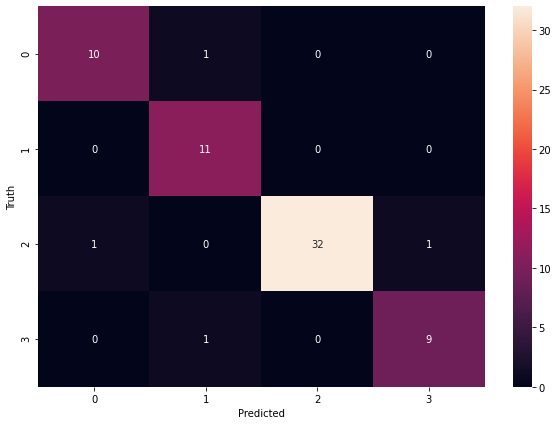

In [523]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# save our model as joblib

In [524]:
import joblib
joblib.dump(best_clf, 'face_classifier_pkl')

['face_classifier_pkl']

In [525]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [526]:
import base64

In [587]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as img_file:
        text = base64.b64decode(img_file.read())
        print(text)

In [588]:
get_base64_encoded_image('dataset/cropped/Lional_messi/Lional_messi_th (105).jpeg.png')

b'<\xd1\x88\x1c4[m\x82\x03\x01<x\x8b)3\xc7\xcb\xcaI\x13" \x98C\x01\x05/\xf6|u\x12\x00\x03\xe5\xca\x16\xdd\xbd\xf9\x04\x01|\xd6\xcbY(1\xd0\x0f\xd4\x18s9[\xa2=\xfe\x94\x12\x00OG\xc5n)\x98\xae\xb7\x8f\xd5\x94\xc7\xf7\xbf\x00N\xc1\xf4\x1c\r\x83\xa1}#\x0er\x00\xe5\xd6\xdfo\xa0TS\xcf`\xdbwP"b\x00\x96\x8dQ\xf46\xe6\xc30=\xc4\x1a7\xd3_\x08/3\xec\xb5\x93\xd4\x05\xd7\xf5\xd1\x81PNU7q\x01\x0f\xd7=\x7fE*kgf\x85\x9c\x9da\xabE\\\x10\x00\xe8\xc3\r\x84\xe3&J\x0cwo\t\x14l!L\x0bL\x16he\x01\t\x98\xe3\x8e@\x10'


In [577]:
# __class_name_to_number = {}
class_number_to_name = {}
# global __class_name_to_number
# global __class_number_to_name
with open("./server/artifacts/class_dictionary.json", 'r')as f:
    class_name_to_number = json.load(f)
    class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

In [578]:
class_number_to_name

{0: 'Lional_messi', 1: 'mbappe', 2: 'Marion_Cotillard', 3: 'paris_hilton'}

In [584]:
print(class_number_to_name[3])

paris_hilton
